In [1]:
from diffusers import DiffusionPipeline
import torch

# Load Stable Diffusion XL Base1.0
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

c:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


In [2]:
# Optional CPU offloading to save some GPU Memory
pipe.enable_model_cpu_offload()

# Loading Trained LoRA Weights
pipe.load_lora_weights("AdamLucek/sdxl-base-1.0-oldbookillustrations-lora")

In [3]:
prompt = "A lion "

# Invoke pipeline to generate image
image = pipe(
    prompt = prompt,
    num_inference_steps=50,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

100%|██████████| 50/50 [00:33<00:00,  1.50it/s]


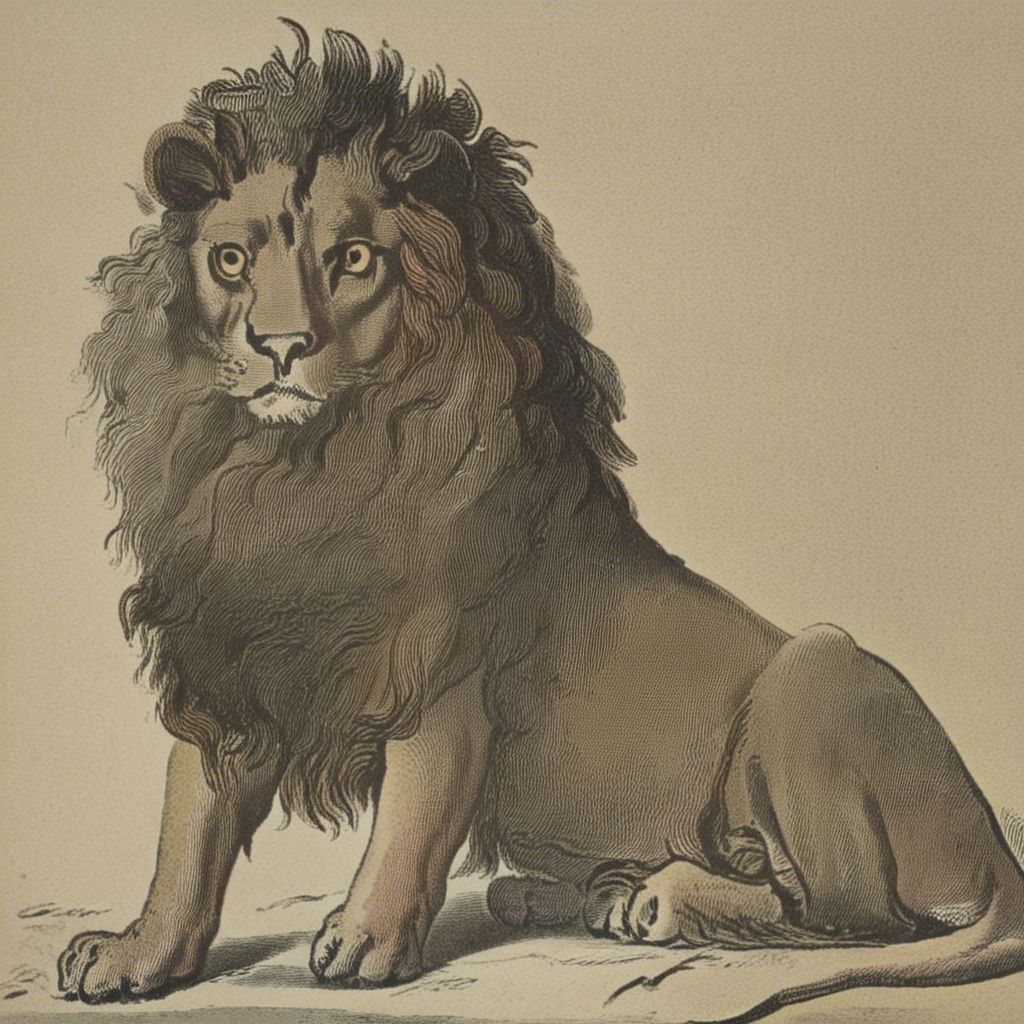

In [4]:
# Display image
image